In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mlgrad.af as af
import mlgrad.func as func
import mlgrad.utils as utils
from sklearn.datasets import load_digits
import mlgrad.pca as pca
from sklearn.preprocessing import robust_scale

In [24]:
X, Y = load_digits(return_X_y=True)

In [25]:
X0 = X[Y == 8]

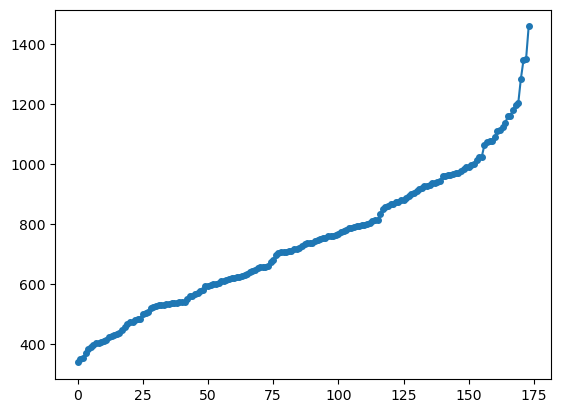

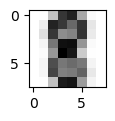

In [26]:
c0 = pca.find_center(X0)
plt.plot(sorted(pca.distance_center(X0, c0)), marker='o', markersize=4)
plt.show()
plt.figure(figsize=(1,1))
plt.imshow(c0.reshape(8,8), cmap=plt.cm.Greys)
plt.show()

0.9080459770114943


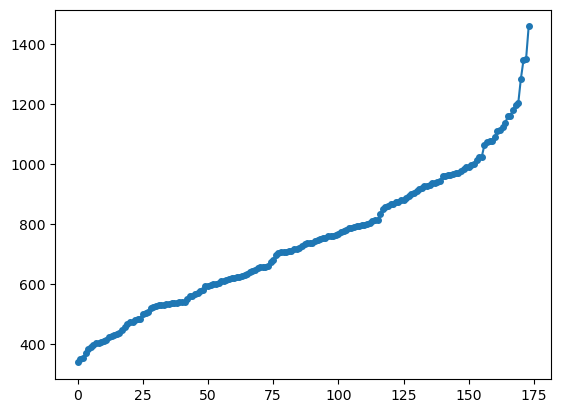

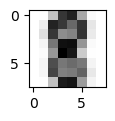

In [27]:
N = len(X0)
alpha = (N - 16) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=alpha)
c = pca.find_rob_center(X0, wma)
plt.plot(sorted(pca.distance_center(X0, c)), marker='o', markersize=4)
plt.show()
plt.figure(figsize=(1,1))
plt.imshow(c.reshape(8,8), cmap=plt.cm.Greys)
plt.show()

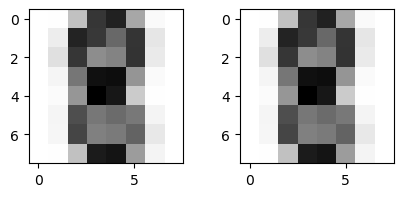

In [28]:
plt.figure(figsize=(5,2))
plt.subplot(1,2,1)
plt.imshow(c0.reshape(8,8), cmap=plt.cm.Greys)
plt.subplot(1,2,2)
plt.imshow(c.reshape(8,8), cmap=plt.cm.Greys)
plt.show()

In [29]:
X1 = X0 - c

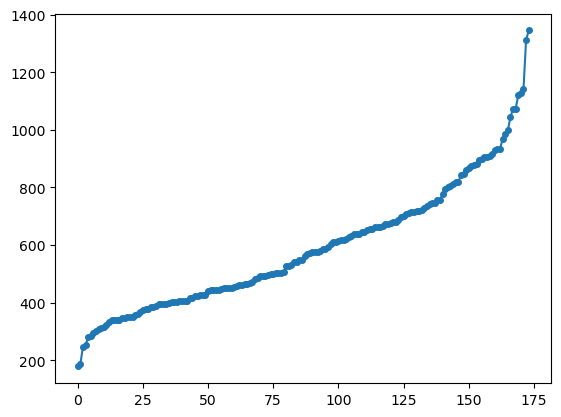

26372.903622582973 [ 0.00000000e+00 -1.09697219e-02 -1.83636129e-01 -7.23641055e-02
  7.94354561e-02  6.56391666e-02  1.28377473e-02  0.00000000e+00
 -7.06181747e-04 -1.74507728e-02 -2.94687133e-02 -4.05251749e-04
  1.77269661e-04  4.81272208e-02  3.58487340e-02  0.00000000e+00
  4.38495688e-05  8.91564516e-02  7.09661719e-02 -1.77804073e-01
 -2.65046379e-01  2.78967929e-02  6.87247783e-02  0.00000000e+00
  0.00000000e+00  4.37403337e-02  1.33477521e-01 -6.59382825e-02
  1.16403632e-03  1.89221600e-01  1.34459729e-02  0.00000000e+00
  0.00000000e+00 -2.08595098e-02 -1.62054644e-01 -7.67420323e-02
  1.79308969e-01  2.66253748e-01  1.08884804e-02  0.00000000e+00
  0.00000000e+00 -3.63967004e-02 -2.03779337e-01  2.72750838e-02
 -1.76635505e-01  3.59887166e-01  1.09615853e-01  0.00000000e+00
  0.00000000e+00 -4.72526435e-02 -2.05297440e-01  1.33801126e-01
 -2.57784244e-01  2.99335124e-01  1.60553604e-01  1.54644068e-04
  0.00000000e+00 -1.05286497e-02 -2.15596318e-01 -9.63850711e-02
  1.33

In [30]:
a1_0, L1_0 = pca.find_pc(X1)
plt.plot(sorted(pca.distance_line(X1, a1_0)), marker='o', markersize=4)
plt.show()
print(L1_0, a1_0)

0.9425287356321839
25257.653677675564 [ 0.00000000e+00 -1.01102779e-02 -1.89148384e-01 -8.61825924e-02
  8.25055206e-02  7.37296981e-02  1.24232252e-02  0.00000000e+00
 -1.16771423e-03 -3.06411433e-02 -4.73348280e-02  2.31477719e-02
 -8.17912457e-04  4.75250880e-02  3.16328023e-02  0.00000000e+00
 -4.36244324e-06  6.31803069e-02  4.56877202e-02 -1.30344861e-01
 -2.61804684e-01  2.95655550e-02  6.92294704e-02  0.00000000e+00
  0.00000000e+00  3.03945907e-02  8.89333691e-02 -5.17009511e-02
  8.10454424e-03  2.01029276e-01  1.28912096e-02  0.00000000e+00
  0.00000000e+00 -1.73069892e-02 -1.46675485e-01 -8.84052488e-02
  1.72376532e-01  2.82380073e-01  1.38817533e-02  0.00000000e+00
  0.00000000e+00 -2.65240201e-02 -1.70099167e-01 -1.89849809e-03
 -1.99557606e-01  3.68949598e-01  1.12077203e-01  0.00000000e+00
  0.00000000e+00 -4.29113722e-02 -1.93372400e-01  1.37997926e-01
 -2.68092853e-01  3.02529457e-01  1.62057667e-01 -4.36233236e-06
  0.00000000e+00 -9.65931209e-03 -2.20107830e-01 -1.

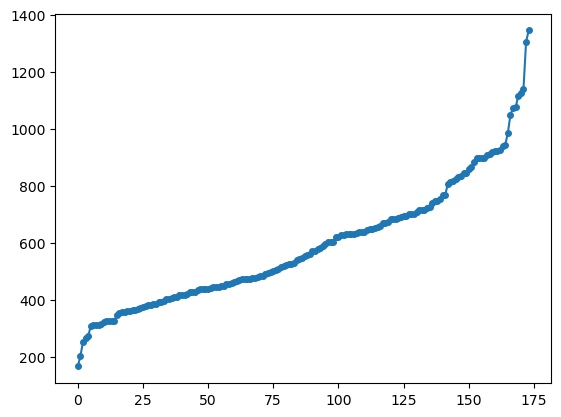

In [31]:
N = len(X0)
alpha = (N - 10) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=alpha)
a1, L1 = pca.find_rob_pc(X1, wma)
print(L1, a1)
plt.plot(sorted(pca.distance_line(X1, a1)), marker='o', markersize=4)
plt.show()
U1 = pca.project_line(X0, a1)
U1_0 = pca.project_line(X0, a1_0)

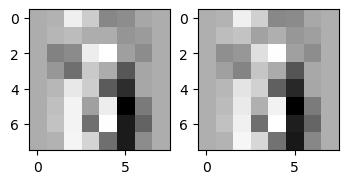

[ 0.00000000e+00 -1.01102779e-02 -1.89148384e-01 -8.61825924e-02
  8.25055206e-02  7.37296981e-02  1.24232252e-02  0.00000000e+00
 -1.16771423e-03 -3.06411433e-02 -4.73348280e-02  2.31477719e-02
 -8.17912457e-04  4.75250880e-02  3.16328023e-02  0.00000000e+00
 -4.36244324e-06  6.31803069e-02  4.56877202e-02 -1.30344861e-01
 -2.61804684e-01  2.95655550e-02  6.92294704e-02  0.00000000e+00
  0.00000000e+00  3.03945907e-02  8.89333691e-02 -5.17009511e-02
  8.10454424e-03  2.01029276e-01  1.28912096e-02  0.00000000e+00
  0.00000000e+00 -1.73069892e-02 -1.46675485e-01 -8.84052488e-02
  1.72376532e-01  2.82380073e-01  1.38817533e-02  0.00000000e+00
  0.00000000e+00 -2.65240201e-02 -1.70099167e-01 -1.89849809e-03
 -1.99557606e-01  3.68949598e-01  1.12077203e-01  0.00000000e+00
  0.00000000e+00 -4.29113722e-02 -1.93372400e-01  1.37997926e-01
 -2.68092853e-01  3.02529457e-01  1.62057667e-01 -4.36233236e-06
  0.00000000e+00 -9.65931209e-03 -2.20107830e-01 -1.06308203e-01
  1.30120082e-01  3.14370

In [32]:
plt.figure(figsize=(4,2))
plt.subplot(1,2,1)
plt.imshow(a1_0.reshape(8,8), cmap=plt.cm.Greys)
plt.subplot(1,2,2)
plt.imshow(a1.reshape(8,8), cmap=plt.cm.Greys)
plt.show()
print(a1)

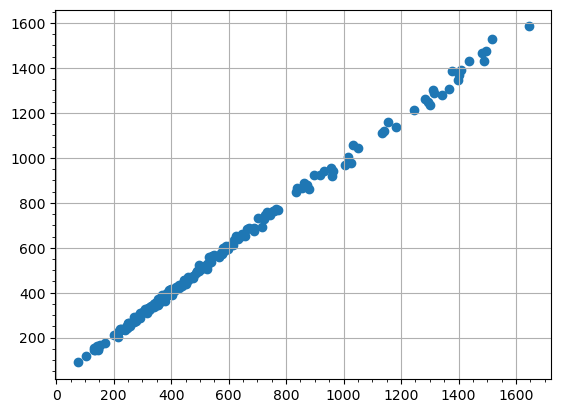

In [15]:
plt.scatter(pca.distance_line(X1, a1_0), pca.distance_line(X1, a1))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [29]:
X2 = pca.project(X1, a1)

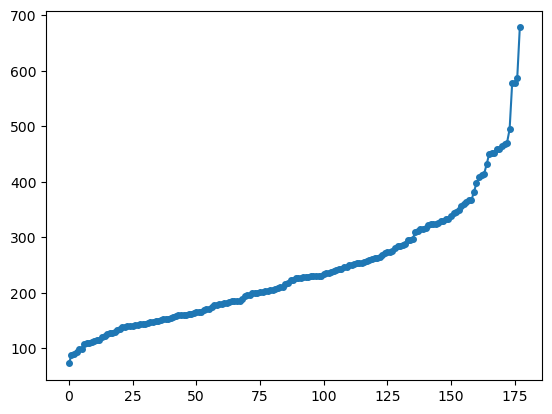

12486.591233799554 [ 0.         -0.0012201   0.10956971 -0.01503469  0.144104    0.21669116
  0.00524501  0.          0.         -0.02176583  0.05534935 -0.05340435
 -0.16821808  0.22411972  0.10965509  0.          0.         -0.07373886
  0.02444789  0.01932653 -0.09013262 -0.1372134   0.17628762  0.
  0.         -0.01902991  0.03099184 -0.01145932 -0.00486265 -0.00063304
  0.00572548  0.          0.          0.01256862 -0.01340481 -0.00804298
  0.00565364  0.22660641 -0.17900472  0.          0.          0.06318545
 -0.06255194 -0.00788523  0.17371491  0.29918976 -0.35865061  0.
  0.          0.04413755  0.08000547 -0.08761912  0.24582563 -0.19955963
 -0.28976365  0.          0.          0.00166459  0.12389983  0.07106354
 -0.1999884  -0.3920173  -0.05189462  0.        ]


In [30]:
a2_0, L2_0 = pca.find_pc(X2)
plt.plot(sorted(pca.distance_line(X2, a2_0)), marker='o', markersize=4)
plt.show()
print(L2_0, a2_0)

0.9438202247191011


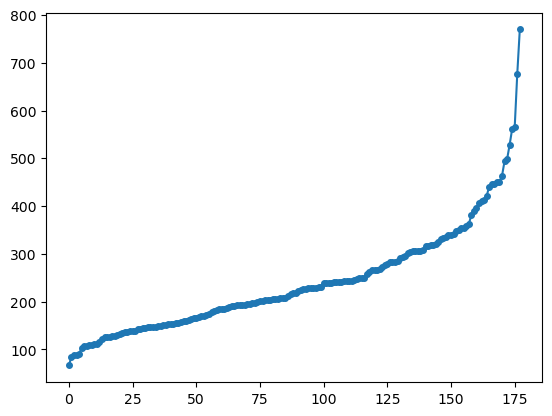

11262.631814853326 [ 0.00000000e+00  2.61468976e-05 -8.44609659e-02  4.78226938e-02
 -1.16585891e-01 -2.22903643e-01 -5.87725230e-03  0.00000000e+00
  0.00000000e+00  2.61736920e-02 -1.40468464e-02  2.99095186e-02
  1.81509111e-01 -2.31667540e-01 -1.20186798e-01  0.00000000e+00
  0.00000000e+00  9.52515033e-02 -1.65411065e-02 -8.60030854e-02
  9.37040616e-02  1.90196106e-01 -1.77433887e-01  0.00000000e+00
  0.00000000e+00  4.04321176e-02 -3.03584677e-02 -2.80441212e-02
  7.22458207e-03  6.01680309e-02  2.03979588e-03  0.00000000e+00
  0.00000000e+00  5.63276097e-03  2.79928875e-02  8.13026334e-03
 -4.12781197e-03 -1.94016204e-01  1.85503755e-01  0.00000000e+00
  0.00000000e+00 -4.32169591e-02  8.44760151e-02  1.73266862e-02
 -1.64732104e-01 -2.73288587e-01  3.71278271e-01  0.00000000e+00
  0.00000000e+00 -3.57717568e-02 -4.51794101e-02  9.49577853e-02
 -2.24084399e-01  2.31907155e-01  2.84418419e-01  0.00000000e+00
  0.00000000e+00 -1.89279246e-03 -9.67811925e-02 -4.71202246e-02
  2.12

In [31]:
N = len(X0)
alpha = (N - 10) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.01), alpha=alpha)
a2, L2 = pca.find_rob_pc(X2, wma)
plt.plot(sorted(pca.distance_line(X2, a2)), marker='o', markersize=4)
plt.show()
print(L2, a2)
U2 = pca.project_line(X0, a2)
U2_0 = pca.project_line(X0, a2_0)

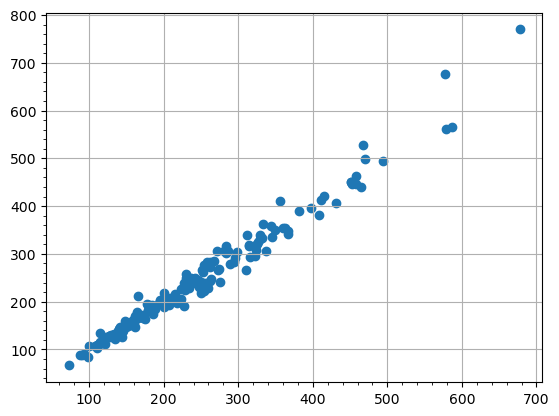

In [32]:
plt.scatter(pca.distance_line(X2, a2_0), pca.distance_line(X2, a2))
plt.minorticks_on()
plt.grid(1)
plt.show()

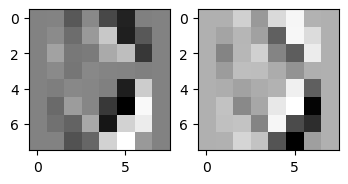

[ 0.00000000e+00  6.66237006e-06 -1.48657415e-01  1.43127657e-02
 -3.72199915e-02 -8.17237162e-02 -1.11378359e-03  0.00000000e+00
  0.00000000e+00 -3.20993505e-02 -1.55458647e-01  1.64577908e-01
  2.44872352e-01 -6.30947151e-02 -3.87912505e-02  0.00000000e+00
  0.00000000e+00 -7.50806157e-02  5.77800454e-02  3.74501004e-01
  1.23603544e-01  1.61672333e-01 -7.46641229e-02  0.00000000e+00
  0.00000000e+00 -7.54862101e-02  2.05655480e-01  2.13152051e-01
  1.05973081e-02  2.15555254e-01 -6.90246645e-02  0.00000000e+00
  0.00000000e+00 -8.19533276e-02  2.59924058e-01  1.30457140e-01
  6.23062038e-03  2.19550867e-01 -3.48919771e-02  0.00000000e+00
  0.00000000e+00 -7.98322994e-02  1.54218968e-01  2.31988668e-01
  1.18760243e-01  2.14786506e-01 -1.42239337e-02  0.00000000e+00
  0.00000000e+00 -1.80982136e-02 -7.94164832e-02  3.09390415e-01
  3.02163666e-01  9.18381525e-02 -4.12107929e-02  0.00000000e+00
  0.00000000e+00  1.66581424e-06 -1.19512406e-01 -7.48904149e-02
  3.01818797e-02 -2.79987

In [33]:
plt.figure(figsize=(4,2))
plt.subplot(1,2,1)
plt.imshow(a2_0.reshape(8,8), cmap=plt.cm.Greys)
plt.subplot(1,2,2)
plt.imshow(a2.reshape(8,8), cmap=plt.cm.Greys)
plt.show()
print(a1)

In [35]:
from sklearn.decomposition import PCA

<BarContainer object of 64 artists>

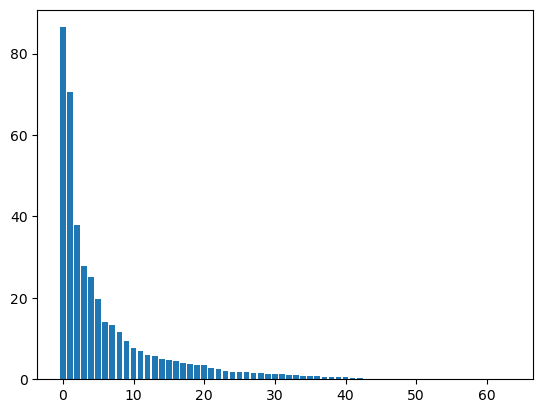

In [39]:
pca = PCA()
pca.fit(X1)
plt.bar(range(64), pca.explained_variance_)

# plt.figure(figsize=(10,5))
# plt.subplot(1,2,1)
# plt.scatter(U1, U2)
# plt.subplot(1,2,2)
# plt.scatter(-U[:,0], -U[:,1])
# plt.show()

(400, 400)


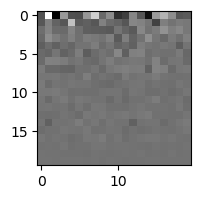

In [62]:
print(U.shape)
plt.figure(figsize=(2,2))
plt.imshow(U[0].reshape(20,20), cmap=plt.cm.Greys)
plt.show()
